In [1]:
# make local editable packages automatically reload
%load_ext autoreload
%autoreload 2

# Import dependencies
import numpy as np
from cellpose import models, core

# This checks to see if you have set up your GPU properly.
# CPU performance is a lot slower, but not a problem if you 
# are only processing a few images.
use_GPU = core.use_gpu()
print('>>> GPU activated? %d'%use_GPU)

# for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 300
plt.style.use('dark_background')
%matplotlib inline

/home/georgeos/miniconda3/envs/omnipose/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2022-08-15 00:42:20,468 [INFO] ** TORCH CUDA version installed and working. **
>>> GPU activated? 1


In [2]:
import tifffile

In [3]:
real_data = tifffile.imread("/home/georgeos/Dropbox (Cambridge University)/Phase/real_data/Lane_02_pos_001_trench_x_0566_y_0059_w_0046_h_0460_c_Phase.tif")[:,:256,:]

Original image shape: (401, 190)
data type: uint16
data range: 77 65447
number of images: 1
new shape:
(401, 190)


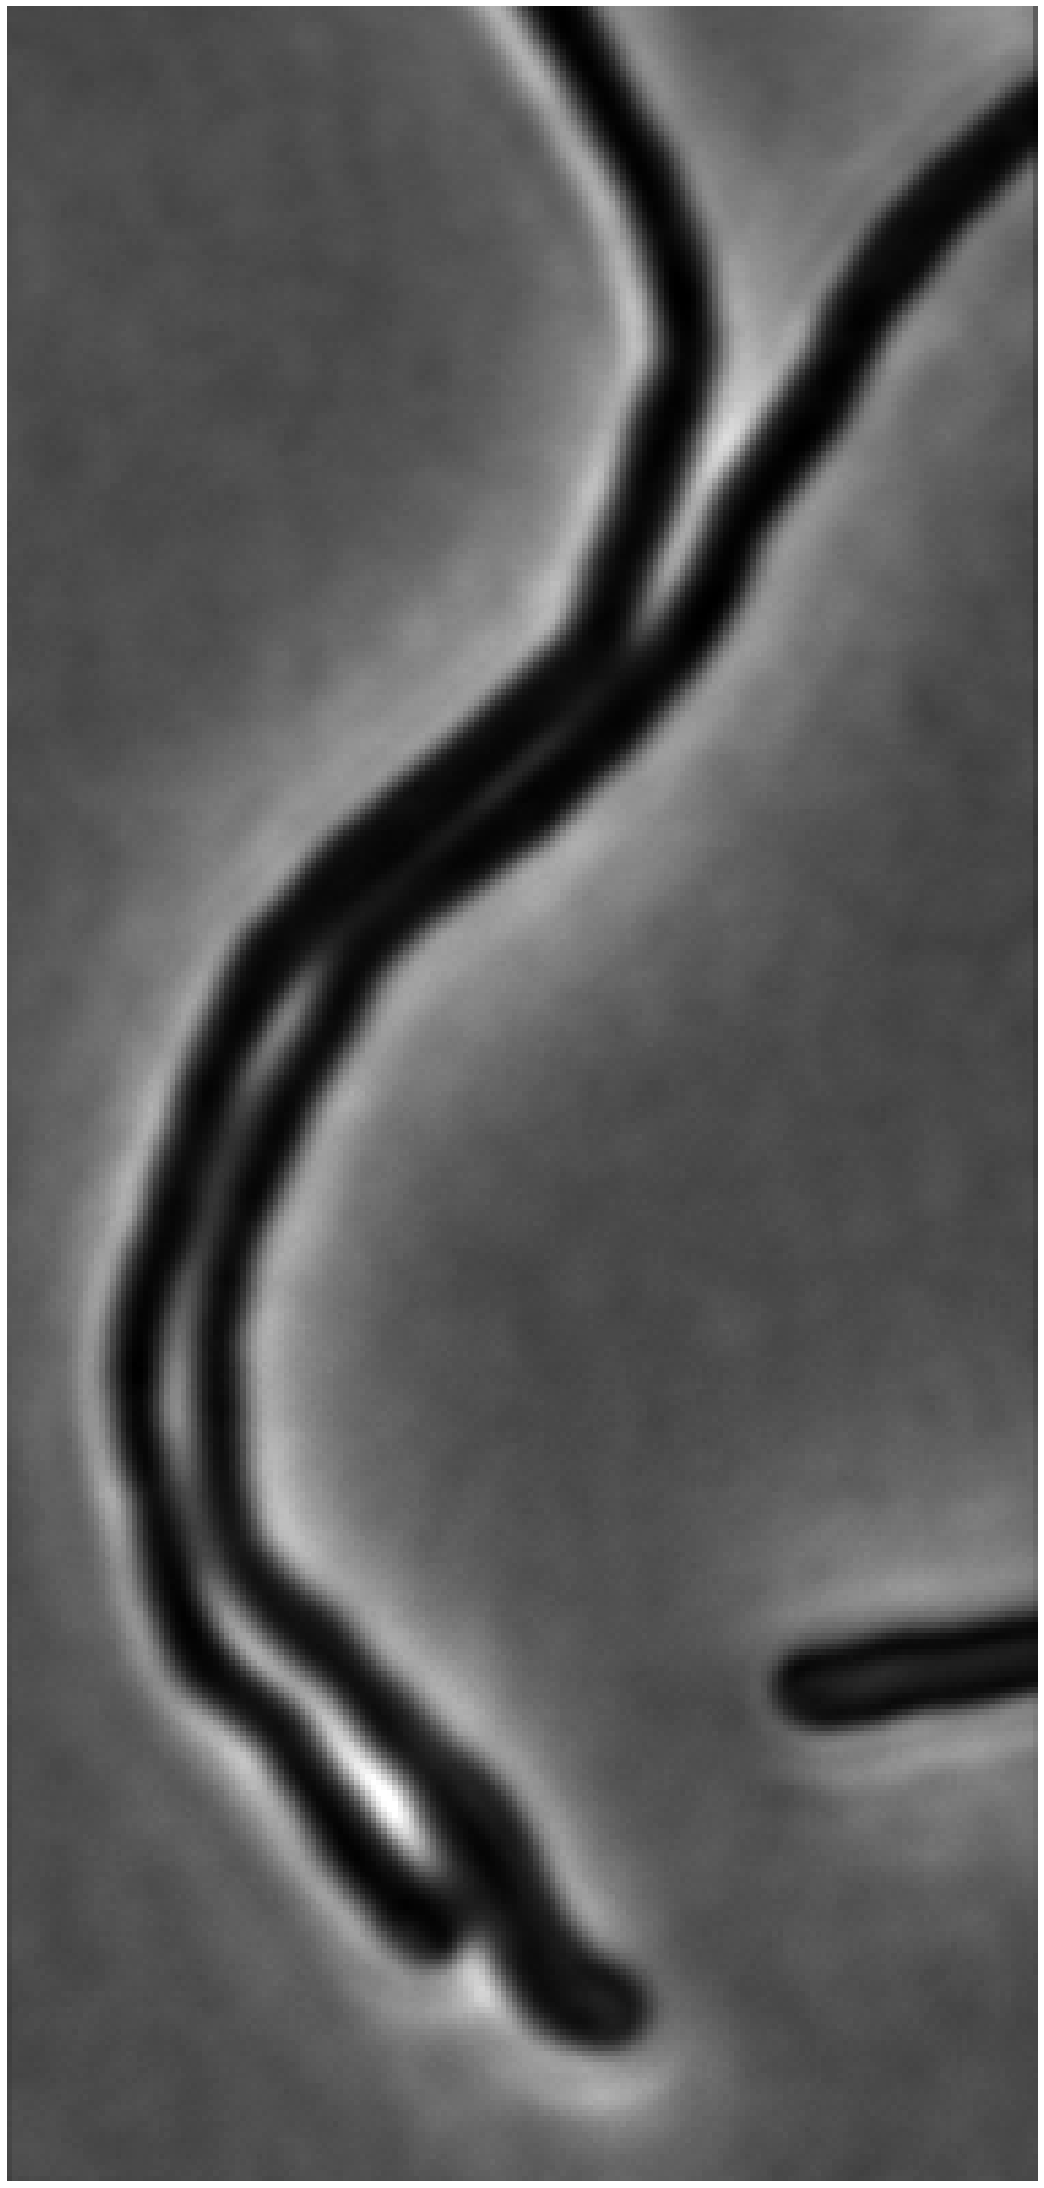

In [49]:
real_data = tifffile.imread("/home/georgeos/Downloads/test_sorted_website/110_img.tif")
from cellpose import io, transforms
from omnipose.utils import normalize99
#imgs = [real_data[0], real_data[100], real_data[200], real_data[201], real_data[802]]
imgs = [real_data]
# print some info about the images.
for i in imgs:
    print('Original image shape:',i.shape)
    print('data type:',i.dtype)
    print('data range:', i.min(),i.max())
nimg = len(imgs)
print('number of images:',nimg)

fig = plt.figure(figsize=[40]*2) # initialize figure
print('new shape:')
for k in range(len(imgs)):
    img = transforms.move_min_dim(imgs[k]) # move the channel dimension last
    if len(img.shape)>2:
        # imgs[k] = img[:,:,1] # could pick out a specific channel
        imgs[k] = np.mean(img,axis=-1) # or just turn into grayscale 
        
    imgs[k] = normalize99(imgs[k])
    print(imgs[k].shape)
    plt.subplot(1,len(imgs),k+1)
    plt.imshow(imgs[k],cmap='gray')
    plt.axis('off')

In [50]:
from cellpose import models
from cellpose.models import MODEL_NAMES

#model_name = '/home/georgeos/Dropbox (Cambridge University)/Phase/omnipose_training_data_mixed/models/cellpose_residual_on_style_on_concatenation_off_omni_omnipose_training_data_mixed_2022_08_12_18_38_07.651186_epoch_2951'
model_name = "/home/georgeos/Dropbox (Cambridge University)/Nikon Nd2 Backup_Bakshi-Lab/gh464/2D_segmentation/100x_agar_PC_training_data/omnipose_training_data/models/cellpose_residual_on_style_on_concatenation_off_omni_omnipose_training_data_2022_08_13_04_52_10.721008_epoch_3801"
model = models.CellposeModel(gpu=use_GPU, pretrained_model=model_name, omni=True, concatenation=True)


2022-08-15 14:13:40,130 [INFO] ** TORCH CUDA version installed and working. **
2022-08-15 14:13:40,130 [INFO] >>>> using GPU


In [51]:
chans = [0,0] #this means segment based on first channel, no second channel 

n = [0] # make a list of integers to select which images you want to segment
n = range(nimg) # or just segment them all 

# define parameters
mask_threshold = -1 
verbose = 0 # turn on if you want to see more output 
use_gpu = use_GPU #defined above
transparency = True # transparency in flow output
rescale=None # give this a number if you need to upscale or downscale your images
omni = True # we can turn off Omnipose mask reconstruction, not advised 
flow_threshold = 0 # default is .4, but only needed if there are spurious masks to clean up; slows down output
resample = True #whether or not to run dynamics on rescaled grid or original grid 

masks, flows, styles = model.eval([imgs[i] for i in n],channels=chans,rescale=rescale,mask_threshold=mask_threshold,transparency=transparency,
                                  flow_threshold=flow_threshold,omni=omni,resample=resample,verbose=verbose)

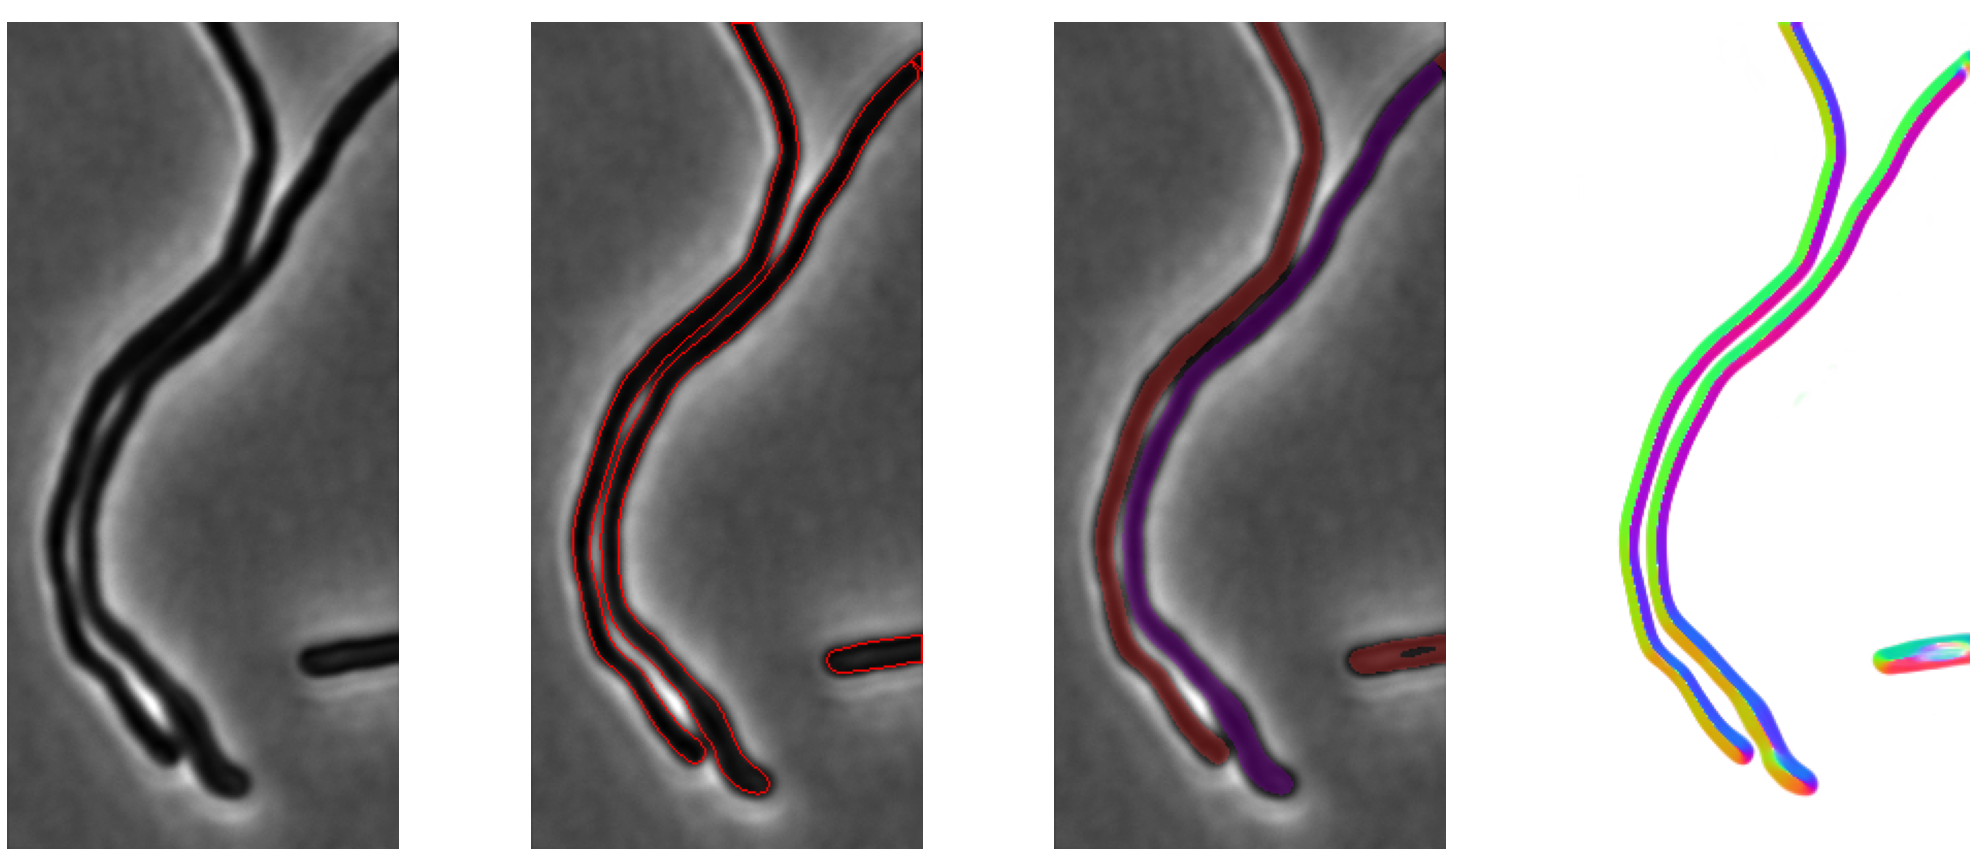

In [52]:
from cellpose import plot
import omnipose

for idx,i in enumerate(n):

    maski = masks[idx]
    flowi = flows[idx][0]

    fig = plt.figure(figsize=(30,12))
    # plot.show_segmentation(fig, omnipose.utils.normalize99(imgs[i][:,:,0:2]), maski, flowi, channels=chans, omni=True, bg_color=0)
    plot.show_segmentation(fig, omnipose.utils.normalize99(imgs[i]), maski, flowi, channels=chans, omni=True, bg_color=0)
    
    plt.tight_layout()
    plt.show()
